# Data Science Project: Portuguese Wine Data 
**Purpose of project: By analyzing this dataset, I plan to get insights on the following: **
* **Based on physicochemical features of a bottle of wine, can we predict its quality rating? (Regression)** 
* **Given all of the inputs (including the quality rating), can we classify a particular wine as red or white? (Classification)**

**Data**: For this project, I will be using a Wine Quality data set. These data track various physicochemical features of both red & white wine and their ratings by wine experts. The data set covers wines that are a part of the Portuguese "Vinho Verde" variety of wine. The wine quality data are sourced from the UCI Machine Learning Repository. Link: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
#Importing all of the modules/libraries to be used
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

#For data vizualizations
%matplotlib inline 
import seaborn as sns

### Data Importing and Transformation
#### Lets start off by importing the data and explore the data to become familiar with it

In [2]:
red_wine = pd.read_csv("../project/winequality-red.csv",
                      sep = ";"
                      )
white_wine = pd.read_csv("../project/winequality-white.csv",
                        sep = ";"
                        )

In [3]:
#Lets check the shape of the 2 data frames
print("Dimensions of Red Wine data set:",red_wine.shape)
print("Dimensions of White Wine data set:",white_wine.shape)

Dimensions of Red Wine data set: (1599, 12)
Dimensions of White Wine data set: (4898, 12)


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data set Variables
#### These are the 12 variables imported from the data set:

* fixed acidity 
* volatile acidity 
* citric acid 
* residual sugar 
* chlorides 
* free sulfur dioxide 
* total sulfur dioxide 
* density 
* pH 
* sulphates 
* alcohol 
* quality: Integer values that range from 1(bad quality) to 10 (excellent quality)

For our Regression question, we will try to predict the quality(target) using the first 11 features

In [6]:
#We should merge the data sets to make this easier..
#lets make sure everything matches up first
print("Columns of the Red Wine data set:",red_wine.columns)
print("Columns of the White Wine data set:",white_wine.columns)

Columns of the Red Wine data set: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Columns of the White Wine data set: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
#Looks fine but lets use a loop to make 100% sure everything matches
num_col = red_wine.shape[1]
for i in range(0, num_col):
    if red_wine.columns[i] == white_wine.columns[i]:
        print(white_wine.columns[i],": MATCH")
    else:
        print("NO MATCH")

fixed acidity : MATCH
volatile acidity : MATCH
citric acid : MATCH
residual sugar : MATCH
chlorides : MATCH
free sulfur dioxide : MATCH
total sulfur dioxide : MATCH
density : MATCH
pH : MATCH
sulphates : MATCH
alcohol : MATCH
quality : MATCH


In [8]:
#and lets check to make sure the data types are the same 
print(red_wine.dtypes)
print(white_wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [9]:
#Again lets just verify
for i in range(0, num_col):
    if red_wine.dtypes[i] == white_wine.dtypes[i]:
        print(white_wine.columns[i],": MATCH")
    else:
        print("NO MATCH")

fixed acidity : MATCH
volatile acidity : MATCH
citric acid : MATCH
residual sugar : MATCH
chlorides : MATCH
free sulfur dioxide : MATCH
total sulfur dioxide : MATCH
density : MATCH
pH : MATCH
sulphates : MATCH
alcohol : MATCH
quality : MATCH


In [10]:
#before we merge, lets add a variable to each dataframe so that we can track whether the wines are white or red
#White will be chosen as the deault true value
red_wine["Is_white_wine"] = False 
white_wine["Is_white_wine"] = True 

In [11]:
#Lets merge the data sets 
wine_data = pd.concat([white_wine,red_wine], axis=0, ignore_index=True)

In [12]:
#checking to make sure everythign worked well
print(wine_data.shape)
print(white_wine.shape[0]+red_wine.shape[0]) # to confirm the proper number of rows
wine_data

(6497, 13)
6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Is_white_wine
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,True
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,True
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,True
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,True
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,True
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,True
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,True
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,True


In [13]:
### The data was merged properly, lets just do a few more things before we really start to explore:
#Remove spaces from the headers for easier use
wine_data.columns = wine_data.columns.map(lambda x: x.replace(" ","_"))
print("Corrected col headers:", wine_data.columns)
#Type cast "Is_white_wine" to int White_wine = 1 ^ Red_wine = 0 
wine_data.Is_white_wine = wine_data.Is_white_wine.astype(int)
wine_data.head()
wine_data.tail()

Corrected col headers: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Is_white_wine'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Is_white_wine
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


In [14]:
#To figure out if there are any NA values 
wine_data.isnull().sum()
#Perfect! There are no NA values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Is_white_wine           0
dtype: int64

### Data Exploration
#### Now that we've loaded, combined and performed basic checks on the data, we can start exploring the data!


In [15]:
#First lets start by looking as the distribution of the quality numbers
wine_data.groupby("quality").size()  #The distribution seems to be relatively normal

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

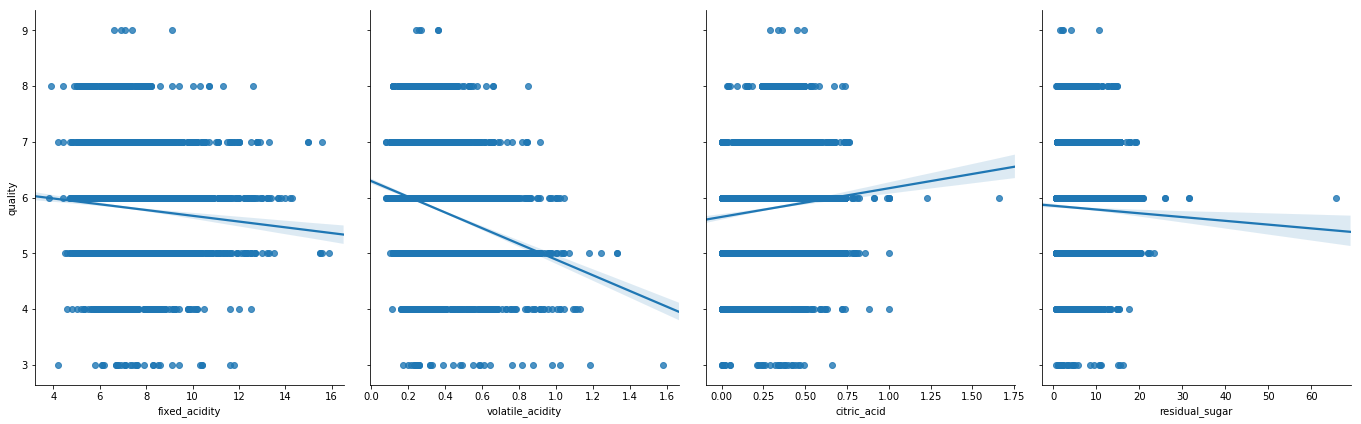

In [16]:
#Creating scatter plots to determine the correlation between each variable and the wine quality
sns.pairplot(wine_data,
            x_vars =wine_data.columns[0:4],
            y_vars = 'quality',
            size = 6,
            aspect= 0.8,
            #hue = "Is_white_wine",
            kind='reg')

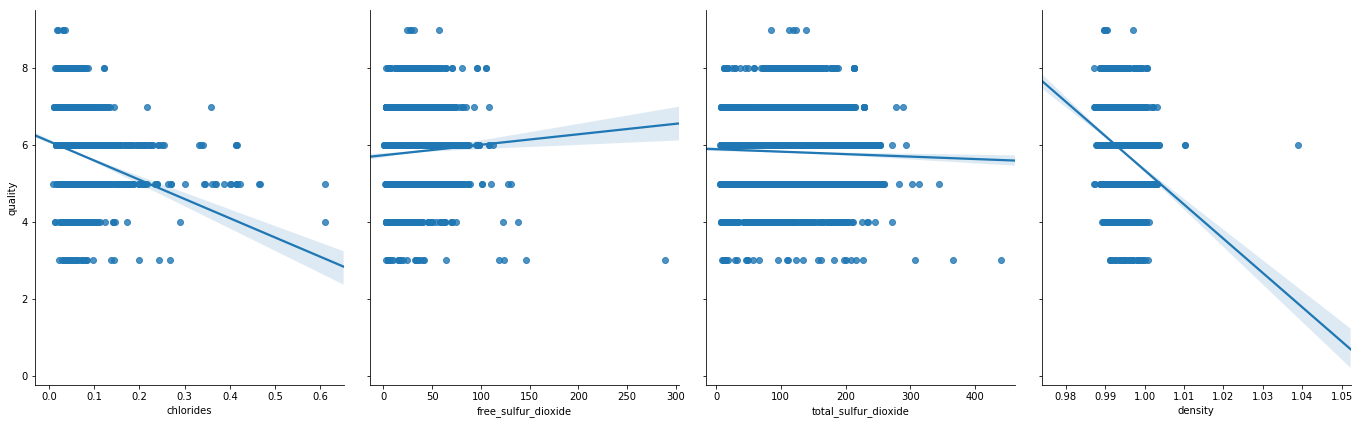

In [17]:
#Creating scatter plots to determine the correlation between each variable and the wine quality
sns.pairplot(wine_data,
            x_vars =wine_data.columns[4:8],
            y_vars = 'quality',
            size = 6,
            aspect= 0.8,
            #hue = "Is_white_wine",
            kind='reg')

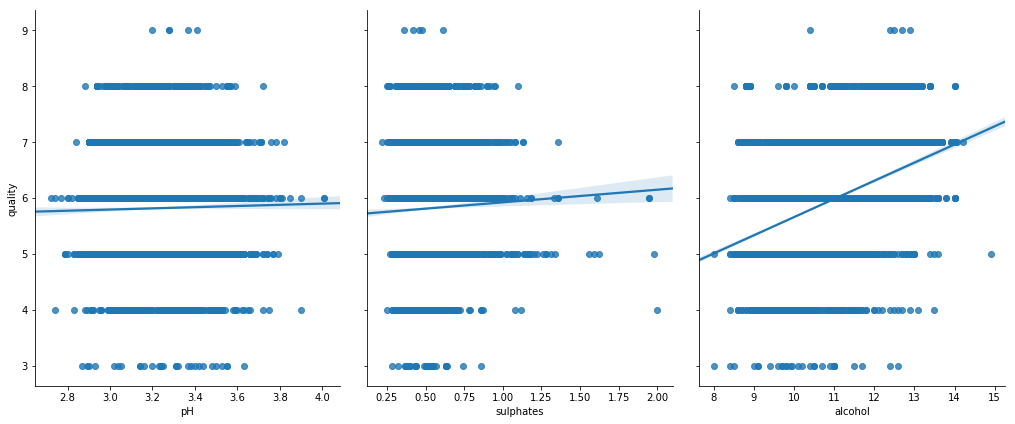

In [18]:
#Creating scatter plots to determine the correlation between each variable and the wine quality
sns.pairplot(wine_data,
            x_vars =wine_data.columns[8:11],
            y_vars = 'quality',
            size = 6,
            aspect= 0.8,
            #hue = "Is_white_wine",
            kind='reg')

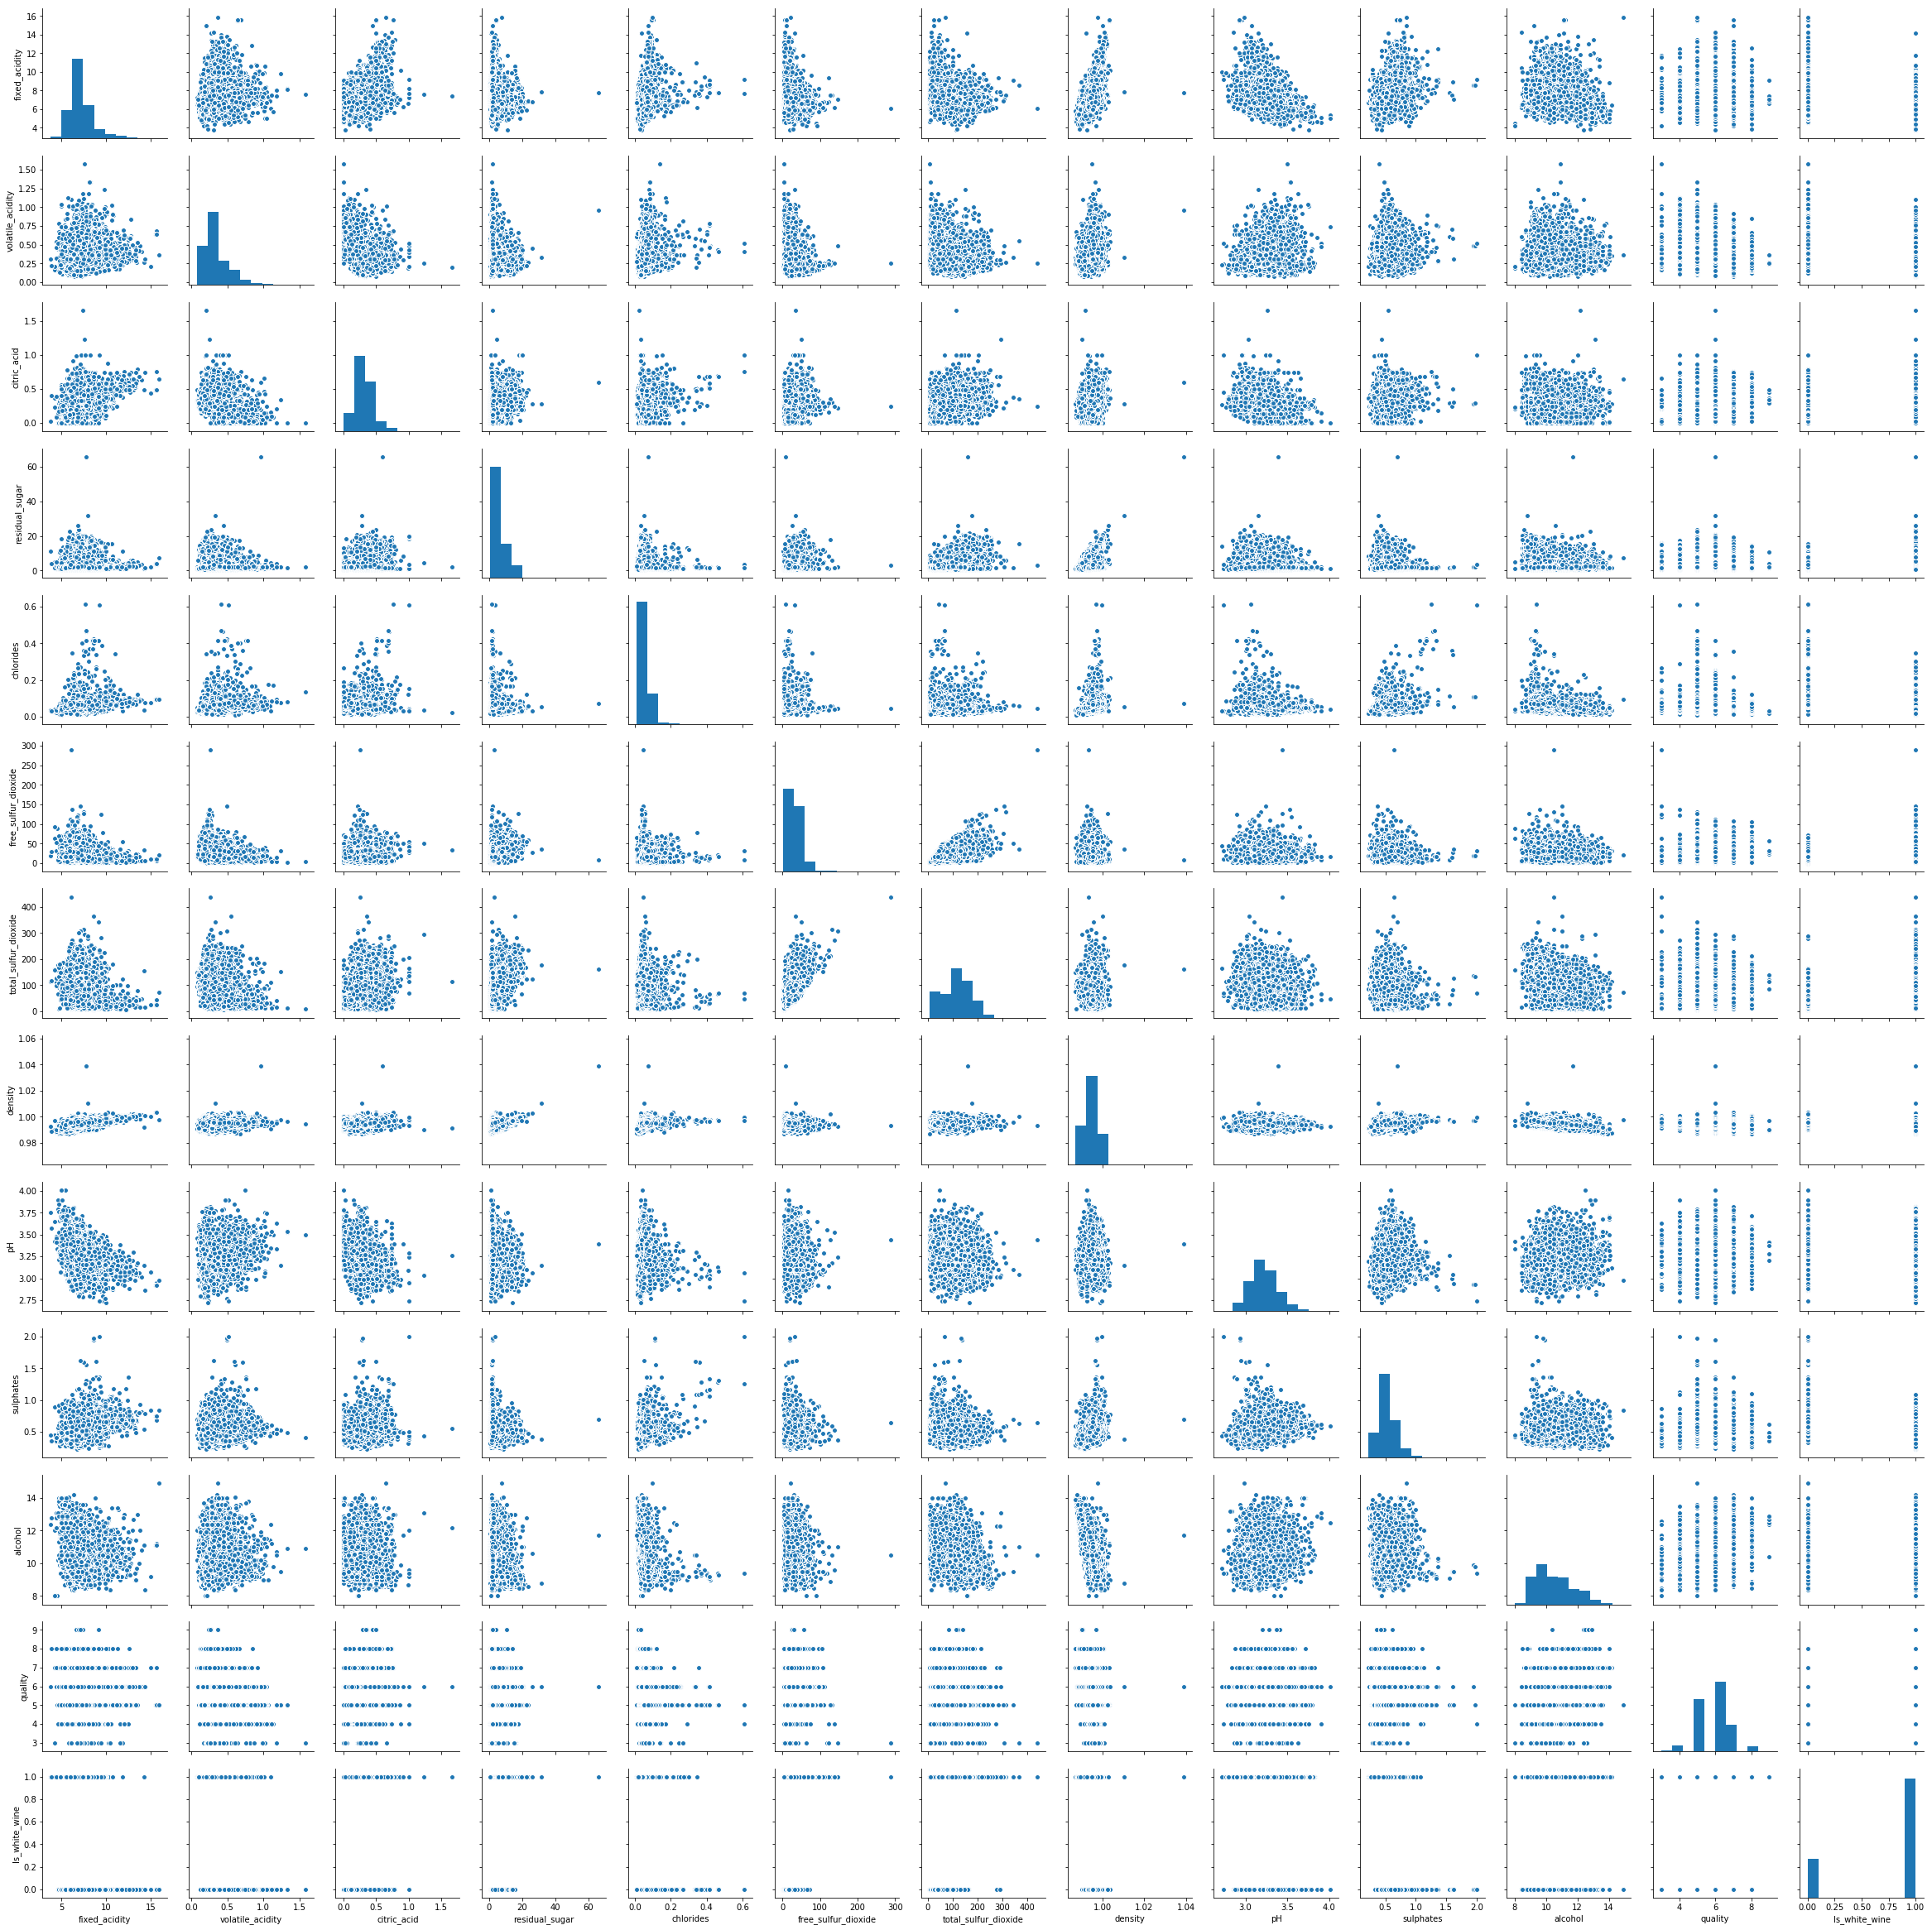

In [19]:
#Using the total pairplot to get an idea of the distributions
sns.pairplot(wine_data)

In [20]:
#Seems like most of the data are unfortunately skewed to the right
##Also visually, it seems like there may be a few outliers that are skewing the data

all_var = wine_data.columns[0:12] #all variables excluding is_white_wine 
wine_data[all_var].apply(stats.skew, axis=0)

fixed_acidity           1.722892
volatile_acidity        1.494751
citric_acid             0.471622
residual_sugar          1.435073
chlorides               5.398581
free_sulfur_dioxide     1.219784
total_sulfur_dioxide   -0.001177
density                 0.503485
pH                      0.386749
sulphates               1.796855
alcohol                 0.565587
quality                 0.189579
dtype: float64

What we can confirm from the skew metrics:
* The distribution of "quality" is slightly right skewed but comfortably close to normally distributed
* Most of the variables in the data set are skewed to the right  (should we transform the data?)

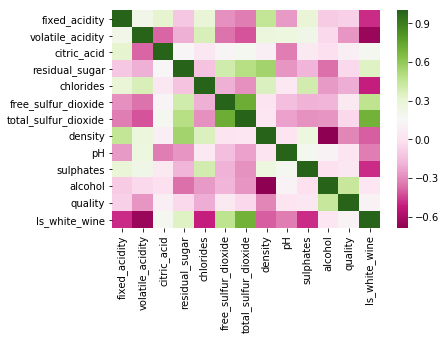

In [21]:
#Lets looks at the correlation matrix for this data now
wine_data_corr = wine_data.corr()
sns.heatmap(wine_data_corr, cmap="PiYG") #most of the variables are negatively correlated with each other

In [22]:
#Create general statistics metrics 
wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Is_white_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [23]:
#Based on the this, there are a few outliers that deviate many standard deviations from the mean. Lets just proceed to see if
#these eaffect us. If so we can get rid of them

### Linear Regression Model

In [24]:
#train test split or cross validation
feature_cols = wine_data.columns[0:11] #includes all variables excluding quality and is_white_wine 
x = wine_data[feature_cols]
y = wine_data.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1)

LinearReg = LinearRegression() # Linear Regression object
LinearReg.fit(x_train, y_train)

y_train_predict = LinearReg.predict(x_train)

#Lets look and the Intercept and the Coefficients 
print("Intercept:", LinearReg.intercept_)

coeffs = LinearReg.coef_
coeff_df = pd.DataFrame(list(zip(feature_cols,np.abs(coeffs))),columns=["features","betas"])
#abs of features to determine importance
coeff_df.sort_values("betas",ascending=False,inplace=True)
coeff_df

Intercept: 58.15630830098672


,features,betas
7,density,57.386304
1,volatile_acidity,1.353963
9,sulphates,0.761952
8,pH,0.452409
4,chlorides,0.438853
10,alcohol,0.259740
2,citric_acid,0.202681
0,fixed_acidity,0.079134
3,residual_sugar,0.045037
5,free_sulfur_dioxide,0.005248


This seems really off...

For example, density is pretty much the main determinant of quality by a large amount. For now, lets continue to see what the performace measures look like




In [25]:
print("Training Data R-squared:", metrics.r2_score(y_train, y_train_predict))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Training Data R-squared: 0.2817185651772707
Training set RMSE: 0.7406958329129143


In [26]:
#Projected R^2 of .28. Looks pretty bad....
# It doesnt look promising but, lets test out on the testing data

y_test_predict = LinearReg.predict(x_test)
print("Test Data R-squared:", metrics.r2_score(y_test, y_test_predict))
print("Test data set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

#find the difference. Theoretically should be positive 
print("The difference between the test RMSE and training RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)) - np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))  )

Test Data R-squared: 0.32171231072446005
Test data set RMSE: 0.7170517385291262
The difference between the test RMSE and training RMSE: -0.023644094383788117


### Model Results
**This model performs absolutely terribly. We can gleam the following from the above: **
* The model underfit the training data because the RMSE for the testing data is lower than for the training data
* The percentage explained errors (R-squared) is about 28% from the training set
* The coefficient for the 'density' feature is by far the main determinant of the target

**What can we do to fix this: **
* Select only most important features
* Perform cross validation


In [27]:
#First lets extract the the features that have a beta of .2 or more
good_betas = coeff_df.betas > .2
coeff_df2 = coeff_df[good_betas]
coeff_df2

,features,betas
7,density,57.386304
1,volatile_acidity,1.353963
9,sulphates,0.761952
8,pH,0.452409
4,chlorides,0.438853
10,alcohol,0.259740
2,citric_acid,0.202681


In [28]:
relevant_cols = coeff_df2.features.tolist()
relevant_cols

['density',
 'volatile_acidity',
 'sulphates',
 'pH',
 'chlorides',
 'alcohol',
 'citric_acid']

In [29]:
x_better = wine_data[relevant_cols]
#y = wine_data.quality same as before
LinearReg2 = LinearRegression()


In [30]:
reg_cross_val_score = cross_val_score(LinearReg2, x_better, y, cv=10, scoring='r2')
print("10 fold r2 score:\n", reg_cross_val_score)
print("Mean of 10 r2 scores:\n", reg_cross_val_score.mean())


10 fold r2 score:
 [0.23450353 0.18844111 0.26422516 0.15858899 0.25779761 0.30806546
 0.14250581 0.31242922 0.30576556 0.35156951]
Mean of 10 r2 scores:
 0.2523891971432829


In [31]:
#This didnt help at all and made the R-squared lower actually. Lets look at the RMSE

reg_cross_val_score2 = cross_val_score(LinearReg2, x_better, y, cv=10, scoring='neg_mean_squared_error')
print("10 fold RMSE score:\n", np.sqrt(np.abs(reg_cross_val_score2)))
print("Mean of 10 RMSE scores:\n", np.sqrt(np.abs(np.mean(reg_cross_val_score2))))

10 fold RMSE score:
 [0.76643523 0.89601669 0.76664344 0.78876249 0.76150118 0.74304416
 0.72578457 0.65927803 0.68115756 0.65652152]
Mean of 10 RMSE scores:
 0.747566912918478


The mean RMSE square is about the same as before and now the R-squared is even lower. This didnt go well either.

Lets try 1 last time with an ensemble of Linear Regression models

In [32]:
bagreg = BaggingRegressor(LinearRegression(), n_estimators=50, bootstrap=True, oob_score=False, random_state=1)
bagreg.fit(x_better, y)
y_pred_bag = bagreg.predict(x_better)

#print("Bag RMSE:",np.sqrt(mean_squared_error(y, y_pred_bag)))
print("Bag R-Squared:", bagreg.score(x_better, y))


Bag R-Squared: 0.2753094994285835


This yielded a slight boost in the R-squared score from about 25% to 27%. Let us try with all of the features and compare them

In [33]:
bagreg2 = BaggingRegressor(LinearRegression(), n_estimators=50, bootstrap=True, oob_score=False, random_state=1)
bagreg.fit(x, y)
y_pred_bag = bagreg.predict(x)
print("Bagged R_squared:", bagreg.score(x, y))

Bagged R_squared: 0.2921220783214118


At the end, we were only able to obtain about 1% more for the R-squared by bagging multiple linear regression models together. The initial RMSE we got from the initial model was about .74, which means that on average we would be wrong guessing the quality score by about .7. When translated into the discrete "quality" rating, this means that we'd be off by +/- 1 when predicting the quality.

### Logistic Regression
#### Now lets on to the classification portion. Based on the physiochemical properties of each wine, can we properly determine whether the wine is a red wine or white wine?

In [34]:
#Percentage of data that came from the white wine dataset
print("Percent of Data Coming From the White Wine Data Set:",white_wine.shape[0]/wine_data.shape[0])


Percent of Data Coming From the White Wine Data Set: 0.7538864091118977


Seems like we have imbalanced classes. White wine samples account for 75% of the data samples.
This will MOST LIKELY be the null accuraccy of our data.



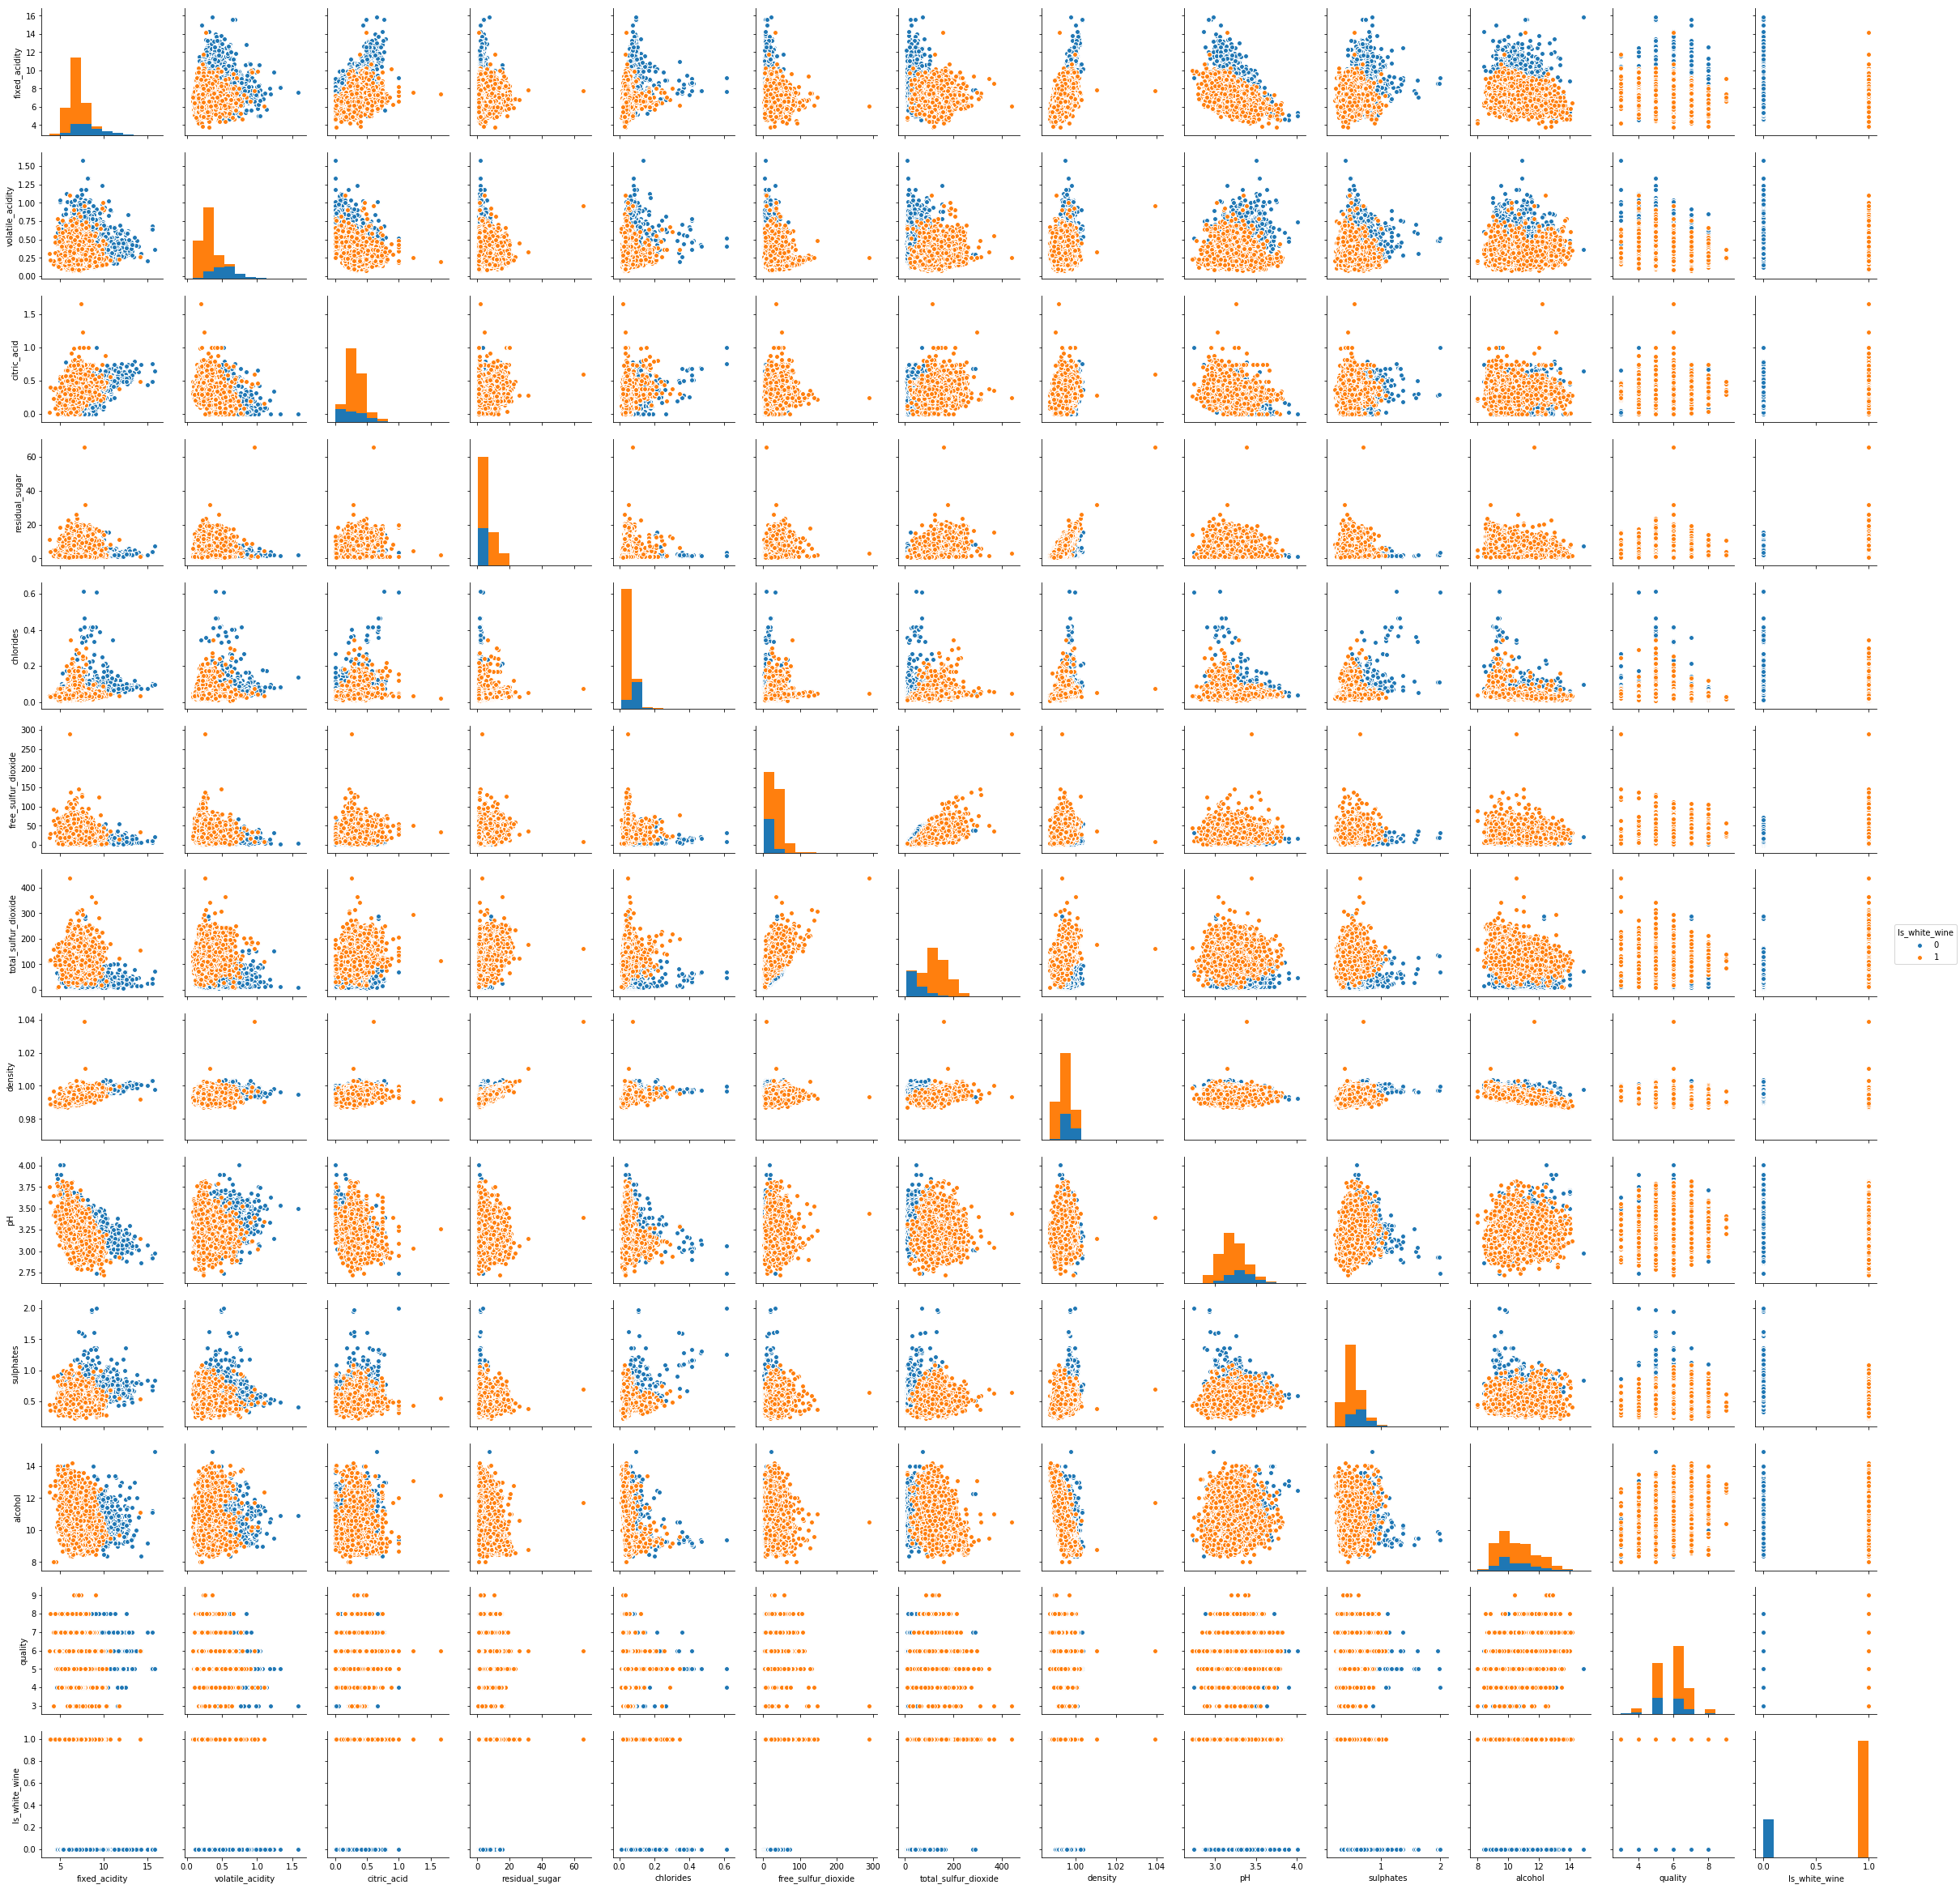

In [35]:
#Lets plot the pairplots again with Is_white_wine as the hue
sns.pairplot(wine_data,
            hue="Is_white_wine")

Seems there is pretty obvious clustering of white wines together across the board for the most part. It seems like it should be fairly easy to be able to predict if a particular is a white wine or red wine

In [36]:
lr_cols = wine_data.columns[0:12] #contains all except "Is_white_wine"
x_lr = wine_data[lr_cols]
y_lr = wine_data.Is_white_wine
LogReg = LogisticRegression(random_state=0)
LR_cross_val_scores = cross_val_score(LogReg, x_lr, y_lr, cv=10, scoring='accuracy') 

print("10 fold Accuracy score:\n", LR_cross_val_scores)
print("Mean of 10 Accuracy scores:\n", LR_cross_val_scores.mean())


10 fold Accuracy score:
 [0.97538462 0.97384615 0.97846154 0.97538462 0.99230769 0.99384615
 0.98769231 0.96769231 0.98613251 0.97993827]
Mean of 10 Accuracy scores:
 0.9810686167776563


The accuracy is extremely high, this is most likely due to the fact that the classes are heavily imbalanced. Lets calculate the ROC/AUC to get a better sense of how the model performs


In [37]:
LR_cross_val_scores = cross_val_score(LogReg, x_lr, y_lr, cv=10, scoring='roc_auc') 
print("10 fold AUC score:\n", LR_cross_val_scores)
print("Mean of 10 AUC scores:\n", LR_cross_val_scores.mean())


#y_predicted = LogReg.predict_proba(x)
#y_predicted

10 fold AUC score:
 [0.99473214 0.99543367 0.99431122 0.99473214 0.99600765 0.99584184
 0.98065051 0.98798469 0.99953988 0.99606436]
Mean of 10 AUC scores:
 0.9935298114152479


The model seems to perform very well in terms of calculating the AUC. Lets take specific model and see how it performs

In [38]:
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr, y_lr, test_size=.25, random_state=1)
LogReg.fit(x_lr_train, y_lr_train)

y_lr_train_predict = LogReg.predict(x_lr_train)
y_lr_train_predict

array([1, 1, 1, ..., 1, 1, 0])

In [41]:
lr_coeffs = LogReg.coef_

In [42]:
print("Intercept:", LogReg.intercept_)
print("")
print(lr_cols)
print(lr_coeffs)

Intercept: [3.37488052]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[[-0.66804357 -7.9249109   0.81894964  0.14990539 -2.48823918 -0.04502265
   0.0634496   3.10976459 -2.33411051 -6.34746987  0.77011876  0.04245978]]


Based on the coefficients produced by the model:

* The amount of Volatile Acidity and Sulphates have the largest chance to decrease the probability of a wine being calssified as a white wine
* The amount of Density increases the probabilty of a wine being classified as a white wine
* Quality has the lowest weightage towards changing the probabilty of class decisions. Meaning that the reviews done were more likely to be blind taste testings

In [ ]:
y_lr_test_predict = LogReg.predict(x_lr_test)

In [ ]:
cm = metrics.confusion_matrix(y_lr_test, y_lr_test_predict)
print("Confusion Matrix:")
cm

Pretty good correct classification rate. There are 1594 correctly classified samples (1224 of which are True Positives), 22 False Negatives, and 9 Misses

In [ ]:
cp = metrics.classification_report(y_lr_test, y_lr_test_predict)
print("Classification Report:")
print(cp)

### Conclusions

#### Linear Regression Model
The RMSE for this model wasn't the best. The calculated r-squared after bagging a couple of Linear Regression models was about 29%. Additionally, the mean RMSE was .7 meaning that on average, we'd be off by almost 1 whole rating. 

#### Classification problem
The classification model did a pretty good job of whether a wine was a white or red wine. There was an average AUC of near 99% across multiple models. Perhaps it was easy to classify a wine due to the chemical differences between white and red wines, which caused the observations to be clustered together. Also there was a small percentage of miss-classification error when we applied the test data to the model.  

#### Possible Next Steps
* Find a better regressor predictor model (perhaps a random forrest?)
* Scale data and get rid of the extreme outliers. See if this would help the model perform better
* Simplify code by creating a pipeline
* Any other suggestions??
